<a href="https://colab.research.google.com/github/sudeepmenon17/PytorchforNN/blob/main/WT_for_VIV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-auth
from google.colab import auth
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install PyWavelets
import pywt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


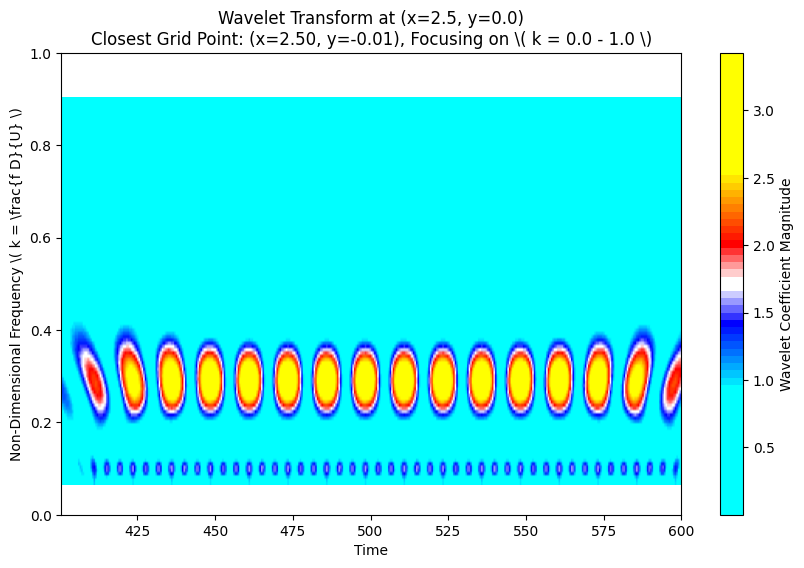

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.io import loadmat
from matplotlib.colors import ListedColormap

# Load Ground_data.mat
file_path = '/content/drive/MyDrive/Re500_RV5_D0p25/VortZ_interp.mat'
data = loadmat(file_path)

Xnew = data['Xnew']  # Vorticity data (grid_points x time_steps)
nxi = int(data['nxi'].item())  # Extract as scalar
nyi = int(data['nyi'].item())  # Extract as scalar
pxnew = data['pxnew'].flatten()  # x-coordinates
pynew = data['pynew'].flatten()  # y-coordinates
Time = data['Time'].flatten()  # Time array
dt = np.mean(np.diff(Time))  # Time step size

# Load CCcool colormap
cccool_data = loadmat('/content/drive/MyDrive/Re500_RV5_D0p9/CCcool.mat')
CC = cccool_data['CC']
custom_cmap = ListedColormap(CC)

# Flow parameters
U = 0.2  # Velocity
D = 1.0  # Characteristic length

# Choose spatial point by coordinates
x_target = 2.5  # Desired x-coordinate
y_target = 0.0  # Desired y-coordinate

# Find the nearest grid point index
distances = np.sqrt((pxnew - x_target)**2 + (pynew - y_target)**2)
nearest_index = np.argmin(distances)  # Index of closest (x, y) point

# Extract vorticity time series at the chosen point
vorticity_series = Xnew[nearest_index, :].flatten()

# Define wavelet scales
scales = np.arange(1, 128)  # Wavelet scales

# Perform Continuous Wavelet Transform (CWT) using Morlet wavelet
coefficients, freqs = pywt.cwt(vorticity_series, scales, 'morl', dt)

# Convert frequency to non-dimensional frequency k = fD/U
k_values = (freqs * D) / U

# Filter for k range 0 - 1.0
valid_indices = np.where((k_values >= 0.0) & (k_values <= 1.0))
filtered_coefficients = coefficients[valid_indices, :][0]
filtered_k_values = k_values[valid_indices]

# Plot wavelet scalogram in terms of non-dimensional frequency k
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(filtered_coefficients), aspect='auto',
           extent=[Time.min(), Time.max(), filtered_k_values.min(), filtered_k_values.max()],
           cmap=custom_cmap, origin='lower')
plt.colorbar(label="Wavelet Coefficient Magnitude")
plt.xlabel("Time")
plt.ylabel("Non-Dimensional Frequency \( k = \\frac{f D}{U} \)")
plt.yscale('linear')  # Keep linear scale for better readability in small range
plt.ylim(0.0, 1.0)  # Focus only on the region k = 0.0 - 1.0
plt.title(f"Wavelet Transform at (x={x_target}, y={y_target})\n"
          f"Closest Grid Point: (x={pxnew[nearest_index]:.2f}, y={pynew[nearest_index]:.2f}), "
          f"Focusing on \( k = 0.0 - 1.0 \)")
plt.show()



🔹 Dominant Frequencies Over Time:
Time: 400.50, Dominant k: 0.214
Time: 401.00, Dominant k: 0.220
Time: 401.50, Dominant k: 0.226
Time: 402.00, Dominant k: 0.232
Time: 402.50, Dominant k: 0.239
Time: 403.00, Dominant k: 0.239
Time: 403.50, Dominant k: 0.246
Time: 404.00, Dominant k: 0.254
Time: 404.50, Dominant k: 0.156
Time: 405.00, Dominant k: 0.163
Time: 405.50, Dominant k: 0.163
Time: 406.00, Dominant k: 0.166
Time: 406.50, Dominant k: 0.169
Time: 407.00, Dominant k: 0.169
Time: 407.50, Dominant k: 0.177
Time: 408.00, Dominant k: 0.177
Time: 408.50, Dominant k: 0.181
Time: 409.00, Dominant k: 0.185
Time: 409.50, Dominant k: 0.185
Time: 410.00, Dominant k: 0.193
Time: 410.50, Dominant k: 0.198
Time: 411.00, Dominant k: 0.198
Time: 411.50, Dominant k: 0.203
Time: 412.00, Dominant k: 0.208
Time: 412.50, Dominant k: 0.208
Time: 413.00, Dominant k: 0.220
Time: 413.50, Dominant k: 0.220
Time: 414.00, Dominant k: 0.226
Time: 414.50, Dominant k: 0.232
Time: 415.00, Dominant k: 0.232
Time:

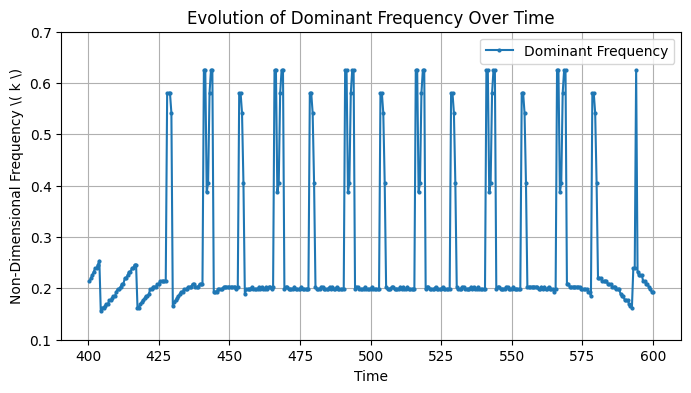

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.io import loadmat
from matplotlib.colors import ListedColormap

# Load Ground_data.mat
file_path = '/content/drive/MyDrive/Re500_RV5_D0p25/VortZ_interp.mat'
data = loadmat(file_path)

Xnew = data['Xnew']  # Vorticity data (grid_points x time_steps)
nxi = int(data['nxi'].item())  # Extract as scalar
nyi = int(data['nyi'].item())  # Extract as scalar
pxnew = data['pxnew'].flatten()  # x-coordinates
pynew = data['pynew'].flatten()  # y-coordinates
Time = data['Time'].flatten()  # Time array
dt = np.mean(np.diff(Time))  # Time step size

# Flow parameters
U = 0.2  # Velocity
D = 1.0  # Characteristic length

# Choose spatial point by coordinates
x_target = 2.5  # Desired x-coordinate
y_target = 0.5  # Desired y-coordinate

# Find the nearest grid point index
distances = np.sqrt((pxnew - x_target)**2 + (pynew - y_target)**2)
nearest_index = np.argmin(distances)  # Index of closest (x, y) point

# Extract vorticity time series at the chosen point
vorticity_series = Xnew[nearest_index, :].flatten()

# Define wavelet scales
scales = np.arange(1, 128)  # Wavelet scales

# Perform Continuous Wavelet Transform (CWT) using Morlet wavelet
coefficients, freqs = pywt.cwt(vorticity_series, scales, 'morl', dt)

# Convert frequency to non-dimensional frequency k = fD/U
k_values = (freqs * D) / U

# Find the dominant frequency at each time step
dominant_indices = np.argmax(np.abs(coefficients), axis=0)  # Index of max coefficient at each time step
dominant_frequencies = k_values[dominant_indices]  # Extract corresponding frequency

# Print dominant frequencies
print("\n🔹 Dominant Frequencies Over Time:")
for t, k in zip(Time, dominant_frequencies):
    print(f"Time: {t:.2f}, Dominant k: {k:.3f}")

# Plot the dominant frequency evolution
plt.figure(figsize=(8, 4))
plt.plot(Time, dominant_frequencies, 'o-', markersize=2, label="Dominant Frequency")
plt.xlabel("Time")
plt.ylabel("Non-Dimensional Frequency \( k \)")
plt.title("Evolution of Dominant Frequency Over Time")
plt.legend()
plt.grid()
plt.ylim(0.1, 0.7)  # Focus on the k range of interest
plt.show()


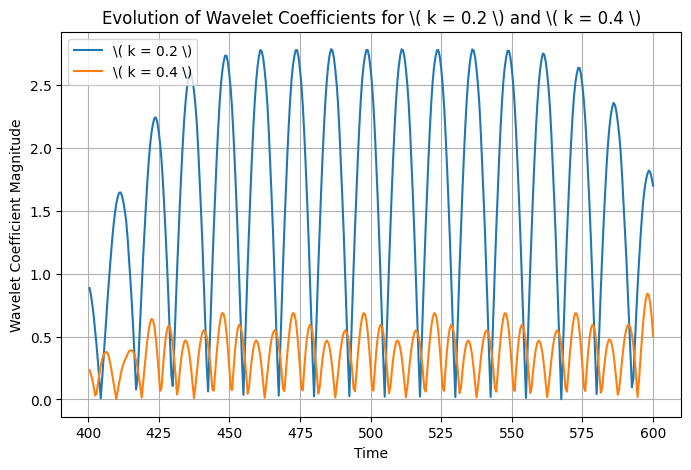

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.io import loadmat
from matplotlib.colors import ListedColormap

# Load Ground_data.mat
file_path = '/content/drive/MyDrive/Re500_RV5_D0p25/VortZ_interp.mat'
data = loadmat(file_path)

Xnew = data['Xnew']  # Vorticity data (grid_points x time_steps)
nxi = int(data['nxi'].item())  # Extract as scalar
nyi = int(data['nyi'].item())  # Extract as scalar
pxnew = data['pxnew'].flatten()  # x-coordinates
pynew = data['pynew'].flatten()  # y-coordinates
Time = data['Time'].flatten()  # Time array
dt = np.mean(np.diff(Time))  # Time step size

# Flow parameters
U = 0.2  # Velocity
D = 1.0  # Characteristic length

# Choose spatial point by coordinates
x_target = 2.5  # Desired x-coordinate
y_target = 0.5  # Desired y-coordinate

# Find the nearest grid point index
distances = np.sqrt((pxnew - x_target)**2 + (pynew - y_target)**2)
nearest_index = np.argmin(distances)  # Index of closest (x, y) point

# Extract vorticity time series at the chosen point
vorticity_series = Xnew[nearest_index, :].flatten()

# Define wavelet scales
scales = np.arange(1, 128)  # Wavelet scales

# Perform Continuous Wavelet Transform (CWT) using Morlet wavelet
coefficients, freqs = pywt.cwt(vorticity_series, scales, 'morl', dt)

# Convert frequency to non-dimensional frequency k = fD/U
k_values = (freqs * D) / U

# Find indices closest to k = 0.2 and k = 0.4
k_0_2_idx = np.argmin(np.abs(k_values - 0.2))
k_0_4_idx = np.argmin(np.abs(k_values - 0.4))

# Extract wavelet coefficients for k = 0.2 and k = 0.4 over time
coeff_k_0_2 = np.abs(coefficients[k_0_2_idx, :])
coeff_k_0_4 = np.abs(coefficients[k_0_4_idx, :])

# Plot the evolution of k = 0.2 and k = 0.4 over time
plt.figure(figsize=(8, 5))
plt.plot(Time, coeff_k_0_2, label="\( k = 0.2 \)", linewidth=1.5)
plt.plot(Time, coeff_k_0_4, label="\( k = 0.4 \)", linewidth=1.5)
plt.xlabel("Time")
plt.ylabel("Wavelet Coefficient Magnitude")
plt.title("Evolution of Wavelet Coefficients for \( k = 0.2 \) and \( k = 0.4 \)")
plt.legend()
plt.grid()
plt.show()


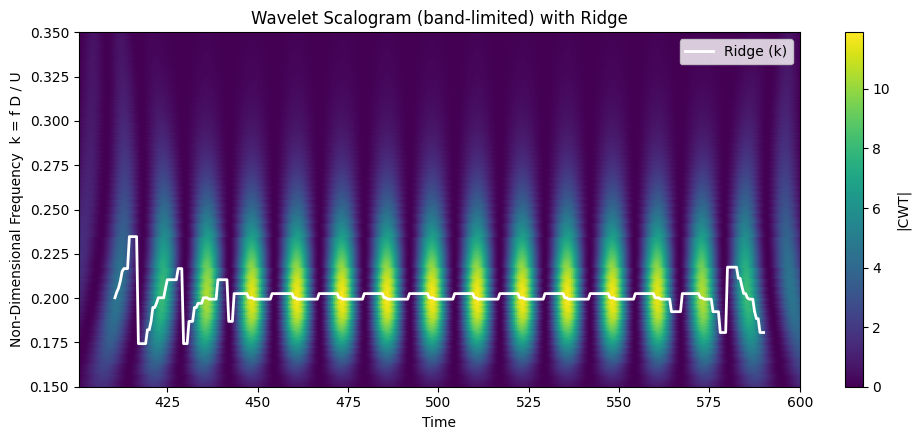

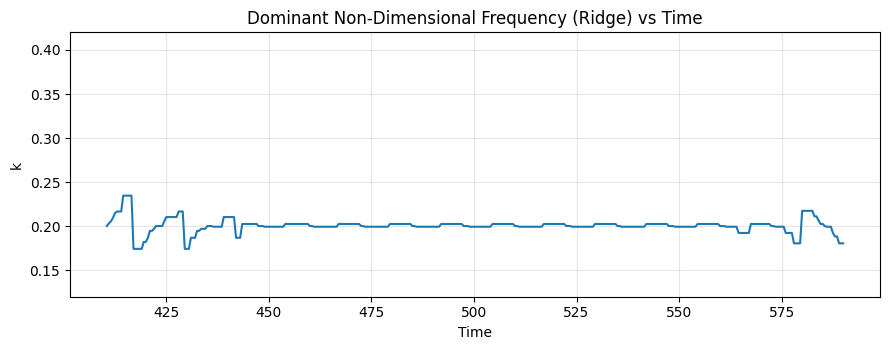

Median k = 0.2002, IQR = 0.0031, dt = 0.5 s, samples = 360/400


In [6]:
import numpy as np
import pywt
from scipy.signal import medfilt
import matplotlib.pyplot as plt

def cwt_ridge(signal, dt, fmin, fmax, smooth=5, trim=0.05, wavelet='morl'):
    """
    Morlet CWT, band-limited ridge extraction.
    Returns:
      f_ridge_full : instantaneous frequency [Hz] (NaN at trimmed edges)
      freqs        : frequency grid used for CWT [Hz]
      power        : |CWT|^2 (freq x time)
    """
    # dense frequency grid within band
    fgrid = np.linspace(fmin, fmax, 256)  # dense grid for better ridge picking
    # invert PyWavelets mapping: f = scale2frequency(wavelet, scale) / dt
    # => scale = scale2frequency(wavelet, 1.0) / (f * dt)
    scales = pywt.scale2frequency(wavelet, 1.0) / (fgrid * dt)

    W, freqs = pywt.cwt(signal, scales, wavelet, sampling_period=dt)  # freqs ~ fgrid
    power = np.abs(W)**2

    T = power.shape[1]
    i0 = int(trim*T)
    i1 = int((1.0 - trim)*T)
    keep = np.arange(i0, i1)  # avoid cone-of-influence edges

    # ridge = argmax over freq *within the band* at each kept time
    ridx = np.argmax(power[:, keep], axis=0)
    f_ridge = freqs[ridx]  # Hz

    # optional smoothing
    if smooth and smooth % 2 == 0:
        smooth += 1
    if smooth and smooth >= 3:
        f_ridge = medfilt(f_ridge, kernel_size=smooth)

    # stitch back into full-length array with NaNs at edges
    f_ridge_full = np.full(T, np.nan)
    f_ridge_full[keep] = f_ridge
    return f_ridge_full, freqs, power


# ---------------- Example usage ----------------
# Inputs you already have:
# - Xnew: (n_points, n_times) vorticityZ
# - Time: (n_times,) time vector
# - Choose a probe index/nearest grid point or a temporal coefficient from POD/DMD
dt = float(np.mean(np.diff(Time)))
U, D = 0.2, 1.0   # your flow parameters

# pick a spatial point (example: nearest to x=2.5,y=0.0)
x_target, y_target = 2.5, 0.0
dist = np.hypot(pxnew - x_target, pynew - y_target)
i_probe = int(np.argmin(dist))
signal = Xnew[i_probe, :].astype(float)

# Choose fundamental band (Hz). If you prefer Strouhal k, k = f*D/U.
# For k in [0.15, 0.35] and U=0.2, D=1 => f in [0.03, 0.07] Hz (example; adjust to your data)
kmin, kmax = 0.15, 0.35
fmin, fmax = kmin*U/D, kmax*U/D

f_ridge, fgrid, power = cwt_ridge(signal, dt, fmin, fmax, smooth=5, trim=0.05, wavelet='morl')
T_ridge = 1.0 / f_ridge                    # instantaneous period (seconds)
k_ridge = f_ridge * D / U                  # non-dimensional frequency

# ------- Plots -------
# 1) Scalogram (band) with ridge overlay
plt.figure(figsize=(10, 4.5))
extent = [Time[0], Time[-1], fgrid[0]*D/U, fgrid[-1]*D/U]  # show k on y-axis
plt.imshow(np.abs(power), aspect='auto', origin='lower', extent=extent, cmap='viridis')
# overlay ridge (k)
plt.plot(Time, k_ridge, 'w-', lw=2, label='Ridge (k)')
plt.colorbar(label='|CWT|')
plt.xlabel('Time')
plt.ylabel('Non-Dimensional Frequency  k = f D / U')
plt.title('Wavelet Scalogram (band-limited) with Ridge')
plt.legend(); plt.tight_layout(); plt.show()

# 2) Ridge vs time
plt.figure(figsize=(9, 3.6))
plt.plot(Time, k_ridge, '-', lw=1.5)
plt.ylim(kmin*0.8, kmax*1.2)
plt.xlabel('Time'); plt.ylabel('k')
plt.title('Dominant Non-Dimensional Frequency (Ridge) vs Time')
plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

# ------- Simple summary stats (ignore NaNs) -------
valid = np.isfinite(k_ridge)
k_med = np.median(k_ridge[valid]) if np.any(valid) else np.nan
k_iqr = np.subtract(*np.percentile(k_ridge[valid], [75, 25])) if np.any(valid) else np.nan
print(f"Median k = {k_med:.4f}, IQR = {k_iqr:.4f}, dt = {dt:.6g} s, samples = {valid.sum()}/{len(valid)}")



Probe near (x=2.5, y=0.5) -> grid (x=2.498, y=0.499)
dt=0.5s, Tspan=199.500s, f_nyq=1.0000Hz
Effective freq band: [0.0075, 0.1600] Hz -> k in [0.038, 0.800]

Dominant k families (clustered):
  k ≈ 0.203 (mean 0.208, IQR 0.048)  | count=450, power share=74.6%
  k ≈ 0.399 (mean 0.389, IQR 0.025)  | count=38, power share=0.5%
  k ≈ 0.608 (mean 0.609, IQR 0.057)  | count=550, power share=24.2%


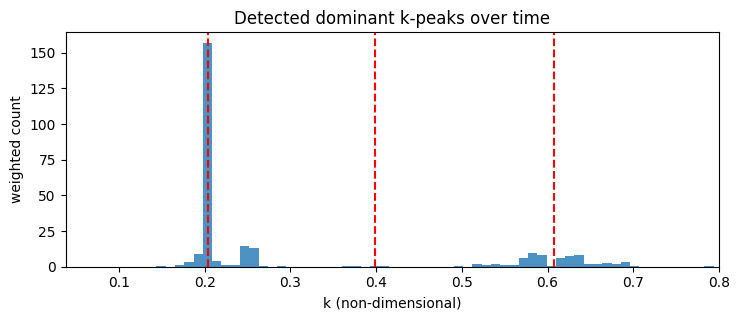

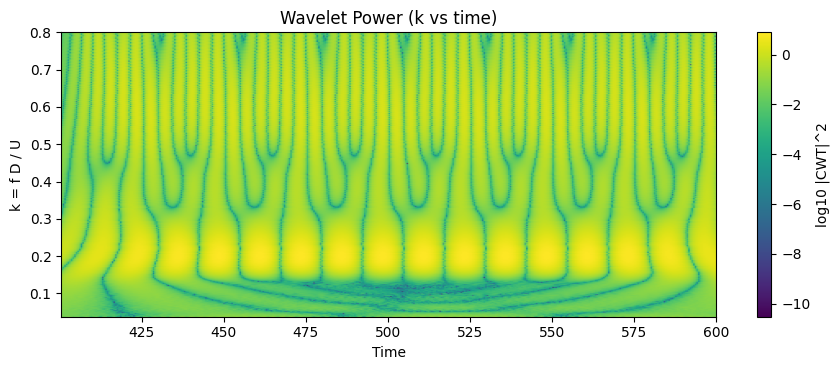

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks
from scipy.io import loadmat
from sklearn.cluster import DBSCAN

# --------------------- USER INPUTS ---------------------
MAT_PATH = '/content/drive/MyDrive/Re500_RV5_D0p25/VortZ_interp.mat'
x_target, y_target = 2.5, 0.5        # probe to analyze
U, D = 0.2, 1.0                      # flow scales for k = f D / U
K_MIN_REQ, K_MAX_REQ = 0.0, 0.8      # requested k-range
NFREQ = 512
TRIM = 0.05
TOP_N = 3
MIN_PROM_FRAC = 0.10
MIN_SEP_K = 0.05
DBSCAN_EPS = 0.02
DBSCAN_MIN_SAMPLES = 25
# -------------------------------------------------------

# -------- Load data ----------
data = loadmat(MAT_PATH)
Xnew = data['Xnew']            # (n_points, n_times)
pxnew = data['pxnew'].ravel()
pynew = data['pynew'].ravel()
Time = data['Time'].ravel()
dt = float(np.mean(np.diff(Time)))
Tspan = float(Time[-1] - Time[0])
f_nyq = 0.5 / dt

# pick nearest grid point
idx = int(np.argmin((pxnew - x_target)**2 + (pynew - y_target)**2))
signal = np.asarray(Xnew[idx, :], dtype=float)

# ---------- Helper: CWT over safe k-band ----------
def cwt_power_over_k(sig, dt, U, D, kmin_req, kmax_req, nfreq=512, wavelet='morl'):
    # Convert requested k-band to Hz
    fmin_req = kmin_req * U / D
    fmax_req = kmax_req * U / D

    # Enforce safe bounds
    fmin_phys = max(1.5 / (Time[-1] - Time[0]), 1.0 / (len(sig) * dt))  # resolvable low bound
    fmax_phys = 0.9 * (0.5 / dt)                                        # below Nyquist

    fmin = max(fmin_req, fmin_phys)
    fmax = min(fmax_req if kmax_req > 0 else fmax_phys, fmax_phys)
    if not np.isfinite(fmin) or not np.isfinite(fmax) or fmin <= 0 or fmax <= fmin:
        raise ValueError(f"Invalid frequency band after safety limits: fmin={fmin}, fmax={fmax}")

    # Frequency grid and scales
    fgrid = np.linspace(fmin, fmax, nfreq)
    scales = pywt.scale2frequency(wavelet, 1.0) / (fgrid * dt)  # finite and reasonable

    W, freqs = pywt.cwt(sig, scales, wavelet, sampling_period=dt)
    power = np.abs(W)**2
    kgrid = freqs * D / U
    return kgrid, power, (fmin, fmax)

kgrid, power, (fmin_eff, fmax_eff) = cwt_power_over_k(
    signal, dt, U, D, K_MIN_REQ, K_MAX_REQ, NFREQ
)

# ---------- Multi-peak scan per time ----------
def multi_peak_scan(kgrid, power, trim=0.05, top_n=3, min_prom_frac=0.10, min_sep_k=0.05):
    T = power.shape[1]
    i0, i1 = int(trim*T), int((1-trim)*T)
    all_k, all_p = [], []
    dk = float(np.median(np.diff(kgrid)))
    distance_pts = max(1, int(min_sep_k / dk))

    for t in range(i0, i1):
        p = power[:, t]
        base = np.median(p) + 1e-12
        peaks, props = find_peaks(p, distance=distance_pts, prominence=min_prom_frac*base)
        if peaks.size == 0:
            continue
        order = np.argsort(p[peaks])[::-1][:top_n]
        keep = peaks[order]
        all_k.append(kgrid[keep])
        all_p.append(p[keep])

    if not all_k:
        return np.array([]), np.array([])
    return np.concatenate(all_k), np.concatenate(all_p)

k_peaks, p_peaks = multi_peak_scan(
    kgrid, power, trim=TRIM, top_n=TOP_N,
    min_prom_frac=MIN_PROM_FRAC, min_sep_k=MIN_SEP_K
)

# ---------- Cluster peaks into families ----------
def cluster_peaks(k_peaks, p_peaks, eps=0.02, min_samples=25):
    if k_peaks.size == 0:
        return []
    X = k_peaks.reshape(-1, 1)
    labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X)
    clusters = []
    for lab in sorted(set(labels)):
        if lab == -1:
            continue
        mask = labels == lab
        ks, ps = k_peaks[mask], p_peaks[mask]
        clusters.append({
            "label": int(lab),
            "k_median": float(np.median(ks)),
            "k_mean": float(np.average(ks, weights=ps)),
            "k_iqr": float(np.subtract(*np.percentile(ks, [75, 25]))),
            "count": int(mask.sum()),
            "power_share": float(ps.sum() / p_peaks.sum())
        })
    clusters.sort(key=lambda d: d["k_median"])
    return clusters

clusters = cluster_peaks(k_peaks, p_peaks, eps=DBSCAN_EPS, min_samples=DBSCAN_MIN_SAMPLES)

# ---------- Report ----------
print(f"\nProbe near (x={x_target}, y={y_target}) -> grid (x={pxnew[idx]:.3f}, y={pynew[idx]:.3f})")
print(f"dt={dt:.6g}s, Tspan={Tspan:.3f}s, f_nyq={f_nyq:.4f}Hz")
print(f"Effective freq band: [{fmin_eff:.4f}, {fmax_eff:.4f}] Hz "
      f"-> k in [{fmin_eff*D/U:.3f}, {fmax_eff*D/U:.3f}]")

if clusters:
    print("\nDominant k families (clustered):")
    for c in clusters:
        print(f"  k ≈ {c['k_median']:.3f} (mean {c['k_mean']:.3f}, IQR {c['k_iqr']:.3f})  "
              f"| count={c['count']}, power share={100*c['power_share']:.1f}%")
else:
    print("No significant peaks detected (try lowering MIN_PROM_FRAC or min_samples).")

# ---------- Plots ----------
plt.figure(figsize=(7.5, 3.3))
if k_peaks.size:
    w = p_peaks / (np.max(p_peaks) + 1e-12)
    plt.hist(k_peaks, bins=60, weights=w, alpha=0.8)
    for c in clusters:
        plt.axvline(c["k_median"], color='r', ls='--', lw=1.5)
plt.xlim(kgrid[0], kgrid[-1])
plt.xlabel('k (non-dimensional)'); plt.ylabel('weighted count')
plt.title('Detected dominant k-peaks over time')
plt.tight_layout(); plt.show()

plt.figure(figsize=(9, 3.8))
extent = [Time[0], Time[-1], kgrid[0], kgrid[-1]]
plt.imshow(np.log10(power + 1e-12), aspect='auto', origin='lower',
           extent=extent, cmap='viridis')
plt.colorbar(label='log10 |CWT|^2')
plt.xlabel('Time'); plt.ylabel('k = f D / U')
plt.title('Wavelet Power (k vs time)')
plt.tight_layout(); plt.show()



Analyzed dt=0.5s, Tspan=199.500s, Nyquist=1.0000Hz

Probe near (x=4.500, y=-0.500) -> grid (x=4.499, y=-0.499)
  k≈0.209  (mean 0.210, IQR 0.042) | count=1037, power=86.4%
  k≈0.565  (mean 0.561, IQR 0.155) | count= 751, power=13.5%
  → 2× not detected in [0.35, 0.45].

Probe near (x=4.500, y=-0.250) -> grid (x=4.499, y=-0.253)
  k≈0.209  (mean 0.210, IQR 0.048) | count=1084, power=88.5%
  k≈0.385  (mean 0.385, IQR 0.009) | count=  10, power=0.0%
  k≈0.602  (mean 0.604, IQR 0.061) | count= 679, power=11.4%
  → 2× candidate: k≈0.385, power share 0.0%

Probe near (x=4.500, y=0.000) -> grid (x=4.499, y=-0.007)
  k≈0.210  (mean 0.211, IQR 0.042) | count=1138, power=90.4%
  k≈0.566  (mean 0.567, IQR 0.001) | count= 162, power=2.2%
  k≈0.602  (mean 0.612, IQR 0.035) | count= 452, power=7.0%
  k≈0.664  (mean 0.664, IQR 0.007) | count=  31, power=0.3%
  → 2× not detected in [0.35, 0.45].

Probe near (x=4.500, y=0.250) -> grid (x=4.499, y=0.253)
  k≈0.209  (mean 0.210, IQR 0.047) | count=1074,

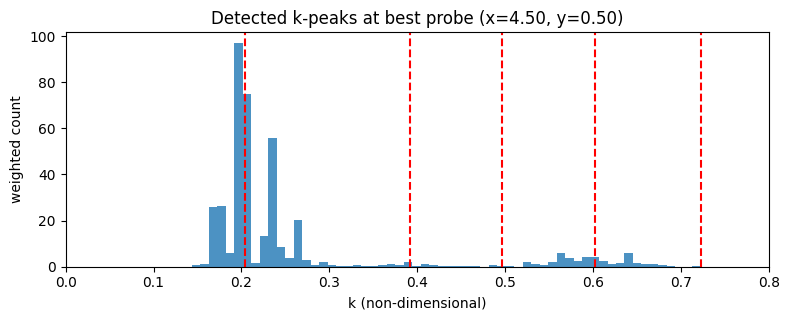

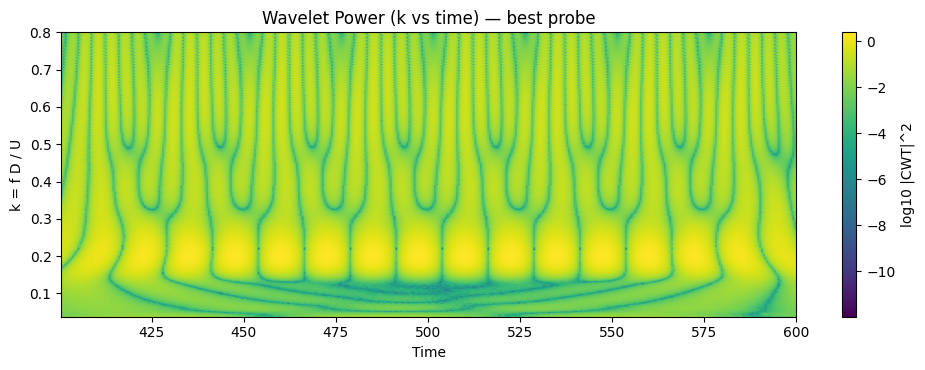

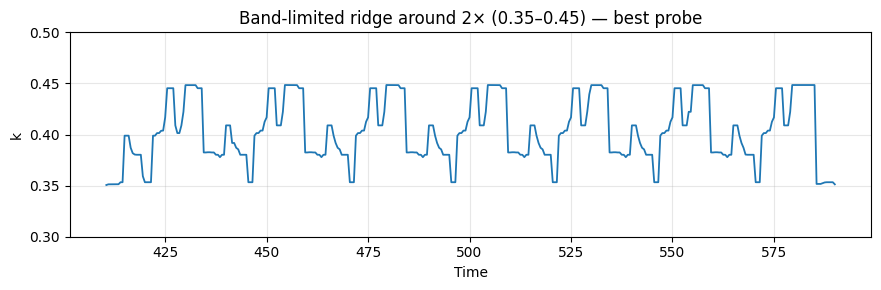

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks, medfilt
from scipy.io import loadmat
from sklearn.cluster import DBSCAN

# ====================== USER SETTINGS ======================
MAT_PATH   = '/content/drive/MyDrive/Re500_RV5_D0p25/VortZ_interp.mat'  # <-- change if needed
U, D       = 0.2, 1.0                       # for k = f*D/U
x_target   = 4.5                             # x where we probe
y_targets  = [-0.5, -0.25, 0.0, 0.25, 0.5]  # try several y's (will snap to nearest grid point)
K_MIN_REQ, K_MAX_REQ = 0.0, 0.8              # requested k sweep for CWT
NFREQ      = 1024                            # k resolution for CWT
TRIM       = 0.05                            # trim edges in time (cone-of-influence)
TOP_N      = 5                               # max peaks kept per time slice
MIN_PROM_FRAC = 0.05                         # peak prominence vs median power at time
MIN_SEP_K  = 0.03                            # min separation between peaks (in k)
DBSCAN_EPS = 0.015                           # cluster width in k for grouping families
DBSCAN_MIN_SAMPLES = 10                      # min peaks to form a family
PLOT_MAX_SCALOGRAMS = 0                      # set >0 to plot per-probe scalograms (optional)
# ===========================================================

# ---------------- Load data ----------------
dat   = loadmat(MAT_PATH)
Xnew  = np.asarray(dat['Xnew'])      # (n_points, n_times)
pxnew = np.asarray(dat['pxnew']).ravel()
pynew = np.asarray(dat['pynew']).ravel()
Time  = np.asarray(dat['Time']).ravel()
dt    = float(np.mean(np.diff(Time)))
Tspan = float(Time[-1] - Time[0])
f_nyq = 0.5 / dt

# ---------------- Utilities ----------------
def nearest_index_to_coord(px, py, x0, y0):
    """Return index of grid point closest to (x0,y0)."""
    return int(np.argmin((px - x0)**2 + (py - y0)**2))

def cwt_power_over_k(sig, dt, U, D, kmin_req, kmax_req, nfreq=512, wavelet='morl'):
    """Morlet CWT power over a safe k-band derived from requested band and signal limits."""
    # Requested (k -> f)
    fmin_req = kmin_req * U / D
    fmax_req = kmax_req * U / D

    # Safe bounds: avoid f=0 and Nyquist
    fmin_phys = max(1.5 / Tspan, 1.0 / (len(sig) * dt))   # resolvable low bound
    fmax_phys = 0.9 * f_nyq                               # below Nyquist

    fmin = max(fmin_req, fmin_phys)
    fmax = min(fmax_req if kmax_req > 0 else fmax_phys, fmax_phys)
    if not np.isfinite(fmin) or not np.isfinite(fmax) or fmin <= 0 or fmax <= fmin:
        raise ValueError(f"Invalid frequency band after safety limits: fmin={fmin}, fmax={fmax}")

    fgrid  = np.linspace(fmin, fmax, nfreq)
    scales = pywt.scale2frequency(wavelet, 1.0) / (fgrid * dt)
    W, freqs = pywt.cwt(sig, scales, wavelet, sampling_period=dt)
    power = np.abs(W)**2
    kgrid = freqs * D / U
    return kgrid, power, (fmin, fmax)

def multi_peak_scan(kgrid, power, trim=0.05, top_n=3, min_prom_frac=0.10, min_sep_k=0.05):
    """Find up to top_n peaks per time in power(k,t); return concatenated k- and power-peaks."""
    T = power.shape[1]
    i0, i1 = int(trim*T), int((1-trim)*T)
    all_k, all_p = [], []
    dk = float(np.median(np.diff(kgrid)))
    distance_pts = max(1, int(min_sep_k / dk))

    for t in range(i0, i1):
        p = power[:, t]
        base = np.median(p) + 1e-12
        peaks, props = find_peaks(p, distance=distance_pts, prominence=min_prom_frac*base)
        if peaks.size == 0:
            continue
        order = np.argsort(p[peaks])[::-1][:top_n]
        keep  = peaks[order]
        all_k.append(kgrid[keep])
        all_p.append(p[keep])

    if not all_k:
        return np.array([]), np.array([])
    return np.concatenate(all_k), np.concatenate(all_p)

def cluster_peaks(k_peaks, p_peaks, eps=0.02, min_samples=25):
    """Group k-peaks into 'families' using DBSCAN; return sorted list of dicts."""
    if k_peaks.size == 0:
        return []
    labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(k_peaks.reshape(-1,1))
    clusters = []
    for lab in sorted(set(labels)):
        if lab == -1:
            continue
        m = labels == lab
        ks, ps = k_peaks[m], p_peaks[m]
        clusters.append({
            "label": int(lab),
            "k_median": float(np.median(ks)),
            "k_mean":   float(np.average(ks, weights=ps)),
            "k_iqr":    float(np.subtract(*np.percentile(ks, [75, 25]))),
            "count":    int(m.sum()),
            "power_share": float(ps.sum() / p_peaks.sum())
        })
    clusters.sort(key=lambda d: d["k_median"])
    return clusters

def band_ridge(signal, dt, U, D, kmin, kmax, nfreq=1024, smooth=5, trim=0.05):
    """Band-limited ridge extraction in [kmin,kmax] to check a specific harmonic."""
    fmin = max(kmin*U/D, 1.5/Tspan)
    fmax = min(kmax*U/D, 0.9*f_nyq)
    fgrid  = np.linspace(fmin, fmax, nfreq)
    scales = pywt.scale2frequency('morl', 1.0)/(fgrid*dt)
    W, freqs = pywt.cwt(signal, scales, 'morl', sampling_period=dt)
    power = np.abs(W)**2
    T = power.shape[1]
    i0, i1 = int(trim*T), int((1-trim)*T)
    ridx = np.argmax(power[:, i0:i1], axis=0)
    k_ridge = (freqs*D/U)[ridx]
    if smooth and smooth % 2 == 0: smooth += 1
    if smooth and smooth >= 3:
        k_ridge = medfilt(k_ridge, kernel_size=smooth)
    kr = np.full(T, np.nan); kr[i0:i1] = k_ridge
    return kr, (freqs*D/U), power

# ---------------- Scan multiple probes ----------------
results = []
plot_count = 0

for y0 in y_targets:
    idx = nearest_index_to_coord(pxnew, pynew, x_target, y0)
    sig = np.asarray(Xnew[idx, :], dtype=float)

    kgrid, power, band = cwt_power_over_k(
        sig, dt, U, D, K_MIN_REQ, K_MAX_REQ, NFREQ
    )
    k_peaks, p_peaks = multi_peak_scan(
        kgrid, power, trim=TRIM, top_n=TOP_N,
        min_prom_frac=MIN_PROM_FRAC, min_sep_k=MIN_SEP_K
    )
    clusters = cluster_peaks(k_peaks, p_peaks, eps=DBSCAN_EPS, min_samples=DBSCAN_MIN_SAMPLES)

    # score the 2× family (closest to k=0.40 within 0.35–0.45)
    two_x_score = 0.0
    two_x_k     = np.nan
    for c in clusters:
        if 0.35 <= c["k_median"] <= 0.45:
            two_x_score = max(two_x_score, c["power_share"])
            two_x_k = c["k_median"]

    results.append({
        "y_target": y0,
        "idx": idx,
        "x_grid": float(pxnew[idx]),
        "y_grid": float(pynew[idx]),
        "clusters": clusters,
        "two_x_score": two_x_score,
        "two_x_k": two_x_k,
        "kgrid": kgrid, "power": power,
        "k_peaks": k_peaks, "p_peaks": p_peaks
    })

    # Optional: per-probe scalogram preview
    if PLOT_MAX_SCALOGRAMS and plot_count < PLOT_MAX_SCALOGRAMS:
        plot_count += 1
        extent = [Time[0], Time[-1], kgrid[0], kgrid[-1]]
        plt.figure(figsize=(9,3.3))
        plt.imshow(np.log10(power + 1e-12), aspect='auto', origin='lower',
                   extent=extent, cmap='viridis')
        plt.colorbar(label='log10 |CWT|^2')
        plt.title(f'Scalogram at (x={pxnew[idx]:.2f}, y={pynew[idx]:.2f})')
        plt.xlabel('Time'); plt.ylabel('k'); plt.tight_layout(); plt.show()

# ---------------- Print summary for all probes ----------------
print(f"\nAnalyzed dt={dt:.6g}s, Tspan={Tspan:.3f}s, Nyquist={f_nyq:.4f}Hz")
for r in results:
    print(f"\nProbe near (x={x_target:.3f}, y={r['y_target']:.3f}) -> grid (x={r['x_grid']:.3f}, y={r['y_grid']:.3f})")
    if r["clusters"]:
        for c in r["clusters"]:
            print(f"  k≈{c['k_median']:.3f}  (mean {c['k_mean']:.3f}, IQR {c['k_iqr']:.3f})"
                  f" | count={c['count']:4d}, power={100*c['power_share']:.1f}%")
    else:
        print("  No significant families detected (try loosening thresholds).")
    if np.isfinite(r["two_x_k"]):
        print(f"  → 2× candidate: k≈{r['two_x_k']:.3f}, power share {100*r['two_x_score']:.1f}%")
    else:
        print("  → 2× not detected in [0.35, 0.45].")

# ---------------- Pick best probe for 2× and plot details ----------------
best = max(results, key=lambda d: d["two_x_score"])

print("\nBest probe for 2× (k≈0.4):")
print(f"  grid (x={best['x_grid']:.3f}, y={best['y_grid']:.3f}) "
      f"from target y={best['y_target']:.3f} | 2× share={100*best['two_x_score']:.1f}% "
      f"| k≈{best['two_x_k']:.3f}")

# Histogram of all detected k-peaks at best probe with cluster markers
plt.figure(figsize=(8,3.3))
if best["k_peaks"].size:
    w = best["p_peaks"] / (np.max(best["p_peaks"]) + 1e-12)
    plt.hist(best["k_peaks"], bins=60, weights=w, alpha=0.8)
for c in best["clusters"]:
    plt.axvline(c["k_median"], color='r', ls='--', lw=1.5)
plt.xlim(K_MIN_REQ, K_MAX_REQ)
plt.xlabel('k (non-dimensional)'); plt.ylabel('weighted count')
plt.title(f'Detected k-peaks at best probe (x={best["x_grid"]:.2f}, y={best["y_grid"]:.2f})')
plt.tight_layout(); plt.show()

# Scalogram at best probe
extent = [Time[0], Time[-1], best["kgrid"][0], best["kgrid"][-1]]
plt.figure(figsize=(10,3.8))
plt.imshow(np.log10(best["power"] + 1e-12), aspect='auto', origin='lower',
           extent=extent, cmap='viridis')
plt.colorbar(label='log10 |CWT|^2')
plt.xlabel('Time'); plt.ylabel('k = f D / U')
plt.title('Wavelet Power (k vs time) — best probe')
plt.tight_layout(); plt.show()

# Band-limited ridge near 2× (0.35–0.45) for best probe
k2_ridge, kgrid2, power2 = band_ridge(
    np.asarray(Xnew[best["idx"], :], dtype=float), dt, U, D, 0.35, 0.45,
    nfreq=1024, smooth=5, trim=TRIM
)
plt.figure(figsize=(9,3.0))
plt.plot(Time, k2_ridge, '-', lw=1.3)
plt.ylim(0.3, 0.5)
plt.xlabel('Time'); plt.ylabel('k')
plt.title('Band-limited ridge around 2× (0.35–0.45) — best probe')
plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()


Using grid point nearest to (x=4.500, y=0.000): (x=4.499, y=-0.007). dt=0.5s, Tspan=199.500s
Effective CWT band: f∈[0.0075,0.1600] Hz → k∈[0.038,0.800]

Detected mode families (clustered across time):
  k≈0.210 (mean 0.211, IQR 0.042) | count=1138, power share=90.4%
  k≈0.566 (mean 0.567, IQR 0.001) | count= 162, power share=2.2%
  k≈0.602 (mean 0.612, IQR 0.035) | count= 452, power share=7.0%
  k≈0.664 (mean 0.664, IQR 0.007) | count=  31, power share=0.3%

Active time windows per mode (thresholded band-power):

Mode near k=0.210: duty-cycle ≈ 25.0%
  active: [434.00, 437.00]  (Δt=3.00s)
  active: [446.50, 449.50]  (Δt=3.00s)
  active: [459.00, 462.00]  (Δt=3.00s)
  active: [471.50, 475.00]  (Δt=3.50s)
  active: [484.00, 487.50]  (Δt=3.50s)
  active: [496.50, 500.00]  (Δt=3.50s)
  active: [509.00, 512.50]  (Δt=3.50s)
  active: [521.50, 525.00]  (Δt=3.50s)
  active: [534.00, 537.50]  (Δt=3.50s)
  active: [546.50, 550.00]  (Δt=3.50s)
  active: [559.00, 562.00]  (Δt=3.00s)
  active: [571

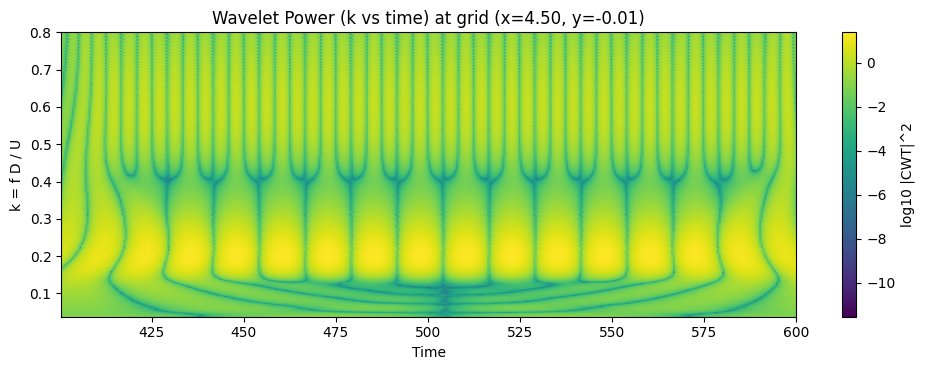

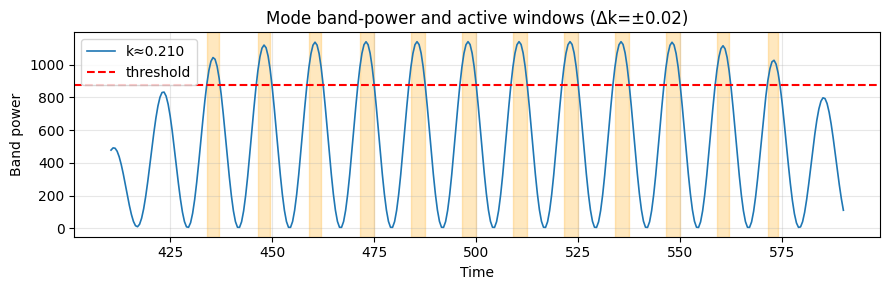

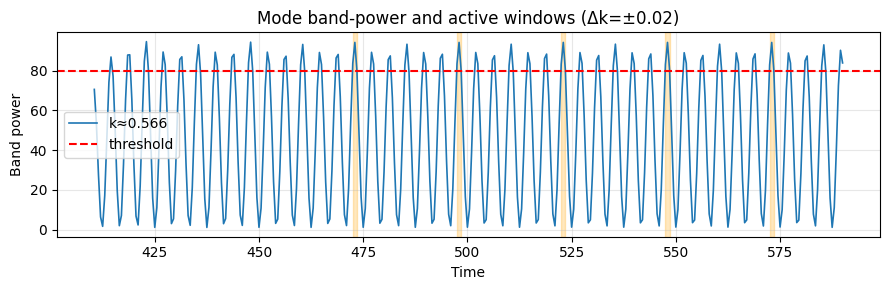

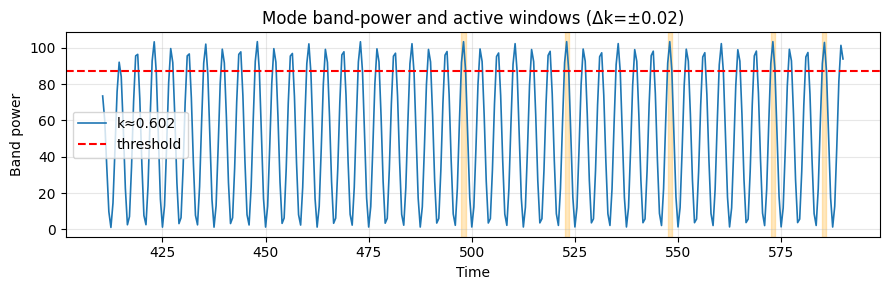

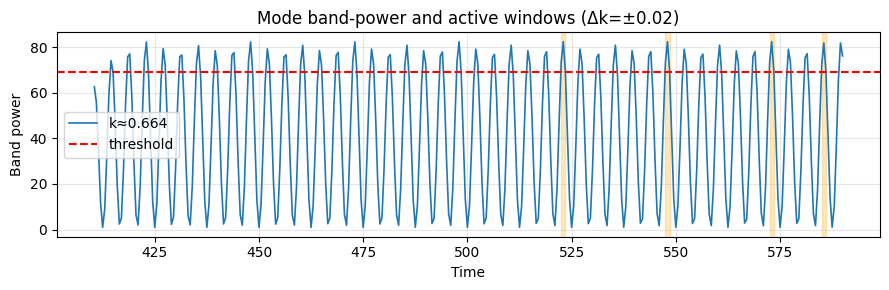

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks, medfilt
from scipy.io import loadmat
from sklearn.cluster import DBSCAN

# ====================== USER SETTINGS ======================
MAT_PATH = '/content/drive/MyDrive/Re500_RV5_D0p25/VortZ_interp.mat'  # <-- change
x_target, y_target = 4.5,0.0      # probe location you want to analyze
U, D = 0.2, 1.0                    # for k = f*D/U

# CWT band and resolution
K_MIN_REQ, K_MAX_REQ = 0.0, 0.8    # requested k-range (safe bounds enforced internally)
NFREQ = 1024                       # k-resolution for CWT

# peak detection & clustering (dominant k families)
TRIM = 0.05                        # trim edges in time (cone-of-influence)
TOP_N = 5                          # max peaks kept per time slice
MIN_PROM_FRAC = 0.05               # peak prominence vs median power at that time
MIN_SEP_K = 0.03                   # min separation between peaks in k
DBSCAN_EPS = 0.015                 # cluster width in k
DBSCAN_MIN_SAMPLES = 10            # min peaks to form a family

# mode-window extraction
BAND_HALFWIDTH = 0.02              # integrate power in [k0-Δk, k0+Δk]
THRESH_METHOD = 'percentile'       # 'percentile' or 'relative'
THRESH_VALUE = 75                  # p75 if percentile, else fraction (e.g. 0.4)
MIN_DURATION = 1.0                 # discard active bursts shorter than this (sec)
# ===========================================================


# ---------------- Load data ----------------
dat = loadmat(MAT_PATH)
Xnew  = np.asarray(dat['Xnew'])      # (n_points, n_times)
pxnew = np.asarray(dat['pxnew']).ravel()
pynew = np.asarray(dat['pynew']).ravel()
Time  = np.asarray(dat['Time']).ravel()
dt    = float(np.mean(np.diff(Time)))
Tspan = float(Time[-1] - Time[0])
f_nyq = 0.5 / dt

# pick nearest grid point
idx = int(np.argmin((pxnew - x_target)**2 + (pynew - y_target)**2))
signal = np.asarray(Xnew[idx, :], dtype=float)
xg, yg = float(pxnew[idx]), float(pynew[idx])

print(f"Using grid point nearest to (x={x_target:.3f}, y={y_target:.3f}): "
      f"(x={xg:.3f}, y={yg:.3f}). dt={dt:.6g}s, Tspan={Tspan:.3f}s")

# ---------- CWT over safe k-band ----------
def cwt_power_over_k(sig, dt, U, D, kmin_req, kmax_req, nfreq=512, wavelet='morl'):
    fmin_req = kmin_req * U / D
    fmax_req = kmax_req * U / D
    fmin_phys = max(1.5 / Tspan, 1.0 / (len(sig) * dt))   # avoid f≈0 (huge scales)
    fmax_phys = 0.9 * (0.5 / dt)                          # below Nyquist
    fmin = max(fmin_req, fmin_phys)
    fmax = min(fmax_req if kmax_req > 0 else fmax_phys, fmax_phys)
    if not np.isfinite(fmin) or not np.isfinite(fmax) or fmin <= 0 or fmax <= fmin:
        raise ValueError(f"Invalid frequency band after safety limits: fmin={fmin}, fmax={fmax}")

    fgrid  = np.linspace(fmin, fmax, nfreq)
    scales = pywt.scale2frequency(wavelet, 1.0) / (fgrid * dt)
    W, freqs = pywt.cwt(sig, scales, wavelet, sampling_period=dt)
    power = np.abs(W)**2
    kgrid = freqs * D / U
    return kgrid, power, (fmin, fmax)

kgrid, power, (fmin_eff, fmax_eff) = cwt_power_over_k(
    signal, dt, U, D, K_MIN_REQ, K_MAX_REQ, NFREQ
)
print(f"Effective CWT band: f∈[{fmin_eff:.4f},{fmax_eff:.4f}] Hz → "
      f"k∈[{fmin_eff*D/U:.3f},{fmax_eff*D/U:.3f}]")

# ---------- Find peaks per time ----------
def multi_peak_scan(kgrid, power, trim=0.05, top_n=3, min_prom_frac=0.10, min_sep_k=0.05):
    T = power.shape[1]
    i0, i1 = int(trim*T), int((1-trim)*T)
    all_k, all_p = [], []
    dk = float(np.median(np.diff(kgrid)))
    distance_pts = max(1, int(min_sep_k / dk))

    for t in range(i0, i1):
        p = power[:, t]
        base = np.median(p) + 1e-12
        peaks, props = find_peaks(p, distance=distance_pts, prominence=min_prom_frac*base)
        if peaks.size == 0:
            continue
        order = np.argsort(p[peaks])[::-1][:top_n]
        keep = peaks[order]
        all_k.append(kgrid[keep])
        all_p.append(p[keep])

    if not all_k:
        return np.array([]), np.array([])
    return np.concatenate(all_k), np.concatenate(all_p)

k_peaks, p_peaks = multi_peak_scan(
    kgrid, power, trim=TRIM, top_n=TOP_N,
    min_prom_frac=MIN_PROM_FRAC, min_sep_k=MIN_SEP_K
)

# ---------- Cluster peaks into mode families ----------
def cluster_peaks(k_peaks, p_peaks, eps=0.02, min_samples=25):
    if k_peaks.size == 0:
        return []
    labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(k_peaks.reshape(-1,1))
    clusters = []
    for lab in sorted(set(labels)):
        if lab == -1:
            continue
        m = labels == lab
        ks, ps = k_peaks[m], p_peaks[m]
        clusters.append({
            "label": int(lab),
            "k_median": float(np.median(ks)),
            "k_mean":   float(np.average(ks, weights=ps)),
            "k_iqr":    float(np.subtract(*np.percentile(ks, [75, 25]))),
            "count":    int(m.sum()),
            "power_share": float(ps.sum() / p_peaks.sum())
        })
    clusters.sort(key=lambda d: d["k_median"])
    return clusters

clusters = cluster_peaks(k_peaks, p_peaks, eps=DBSCAN_EPS, min_samples=DBSCAN_MIN_SAMPLES)

print("\nDetected mode families (clustered across time):")
if not clusters:
    print("  No significant families (loosen MIN_PROM_FRAC / MIN_SAMPLES).")
for c in clusters:
    print(f"  k≈{c['k_median']:.3f} (mean {c['k_mean']:.3f}, IQR {c['k_iqr']:.3f}) "
          f"| count={c['count']:4d}, power share={100*c['power_share']:.1f}%")

# ---------- Extract time windows per mode ----------
def mode_windows_from_scalogram(Time, kgrid, power, clusters,
                                band_halfwidth=0.02,
                                thresh_method='percentile', thresh_value=75,
                                min_duration=0.0, trim_frac=0.05):
    results = []
    T = power.shape[1]
    i0, i1 = int(trim_frac*T), int((1-trim_frac)*T)
    tvec = Time[i0:i1]
    for c in clusters:
        k0 = c['k_median']
        mask_k = (kgrid >= k0 - band_halfwidth) & (kgrid <= k0 + band_halfwidth)
        if not np.any(mask_k):
            results.append({"k_center": k0, "windows": [], "series": None})
            continue
        band_power = power[mask_k, i0:i1].sum(axis=0)

        if thresh_method == 'percentile':
            thr = np.percentile(band_power, thresh_value)
        elif thresh_method == 'relative':
            thr = float(thresh_value) * np.max(band_power)
        else:
            raise ValueError("thresh_method must be 'percentile' or 'relative'")

        active = band_power >= thr
        windows = []
        if np.any(active):
            edges = np.diff(active.astype(int), prepend=0, append=0)
            starts = np.where(edges == 1)[0]
            ends   = np.where(edges == -1)[0] - 1
            for s, e in zip(starts, ends):
                ts, te = tvec[s], tvec[e]
                if (te - ts) >= min_duration:
                    windows.append((float(ts), float(te)))

        duty = np.sum(active) / active.size
        results.append({
            "k_center": float(k0),
            "windows": windows,
            "series": band_power,
            "threshold": float(thr),
            "duty_cycle": float(duty),
            "band_halfwidth": float(band_halfwidth),
            "tvec": tvec
        })
    return results

win_info = mode_windows_from_scalogram(
    Time, kgrid, power, clusters,
    band_halfwidth=BAND_HALFWIDTH,
    thresh_method=THRESH_METHOD, thresh_value=THRESH_VALUE,
    min_duration=MIN_DURATION, trim_frac=TRIM
)

print("\nActive time windows per mode (thresholded band-power):")
for w in win_info:
    k0 = w["k_center"]
    print(f"\nMode near k={k0:.3f}: duty-cycle ≈ {100*w['duty_cycle']:.1f}%")
    if w["windows"]:
        for (ts, te) in w["windows"]:
            print(f"  active: [{ts:.2f}, {te:.2f}]  (Δt={te-ts:.2f}s)")
    else:
        print("  no windows above threshold (with current settings)")

# ---------- Plots ----------
# 1) Scalogram
extent = [Time[0], Time[-1], kgrid[0], kgrid[-1]]
plt.figure(figsize=(10,3.8))
plt.imshow(np.log10(power + 1e-12), aspect='auto', origin='lower',
           extent=extent, cmap='viridis')
plt.colorbar(label='log10 |CWT|^2')
plt.xlabel('Time'); plt.ylabel('k = f D / U')
plt.title(f'Wavelet Power (k vs time) at grid (x={xg:.2f}, y={yg:.2f})')
plt.tight_layout(); plt.show()

# 2) Band-power series with shaded windows for each mode
for w in win_info:
    if w["series"] is None:
        continue
    tvec = w["tvec"]
    plt.figure(figsize=(9,3))
    plt.plot(tvec, w["series"], lw=1.2, label=f"k≈{w['k_center']:.3f}")
    plt.axhline(w["threshold"], ls='--', color='r', label='threshold')
    for (ts, te) in w["windows"]:
        plt.axvspan(ts, te, color='orange', alpha=0.25)
    plt.xlabel("Time"); plt.ylabel("Band power")
    plt.title(f"Mode band-power and active windows (Δk=±{BAND_HALFWIDTH})")
    plt.legend(); plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()


Using grid point nearest to (x=2.500, y=0.000) -> (x=2.498, y=-0.007); dt=0.5s, span=199.500s
Effective band: f ∈ [0.0075,0.1600] Hz  →  k ∈ [0.038,0.800]

Detected dominant modes (k): 0.193, 0.227

Active time windows:
  k≈0.193: 5 window(s), total 166.00s
     [410.50, 414.00]  (Δt=3.50s)
     [419.00, 426.50]  (Δt=7.50s)
     [430.00, 440.00]  (Δt=10.00s)
     [442.00, 578.50]  (Δt=136.50s)
     [581.50, 590.00]  (Δt=8.50s)
  k≈0.227: 30 window(s), total 90.50s
     [410.50, 417.00]  (Δt=6.50s)
     [419.50, 429.50]  (Δt=10.00s)
     [432.00, 435.50]  (Δt=3.50s)
     [438.00, 440.00]  (Δt=2.00s)
     [441.50, 441.50]  (Δt=0.00s)
     [444.50, 447.50]  (Δt=3.00s)
     [450.00, 452.00]  (Δt=2.00s)
     [457.00, 460.00]  (Δt=3.00s)
     [462.50, 464.50]  (Δt=2.00s)
     [469.50, 472.50]  (Δt=3.00s)
     [475.00, 477.00]  (Δt=2.00s)
     [482.00, 485.00]  (Δt=3.00s)
     [487.50, 489.50]  (Δt=2.00s)
     [494.50, 497.50]  (Δt=3.00s)
     [500.00, 502.00]  (Δt=2.00s)
     [507.00, 510.00

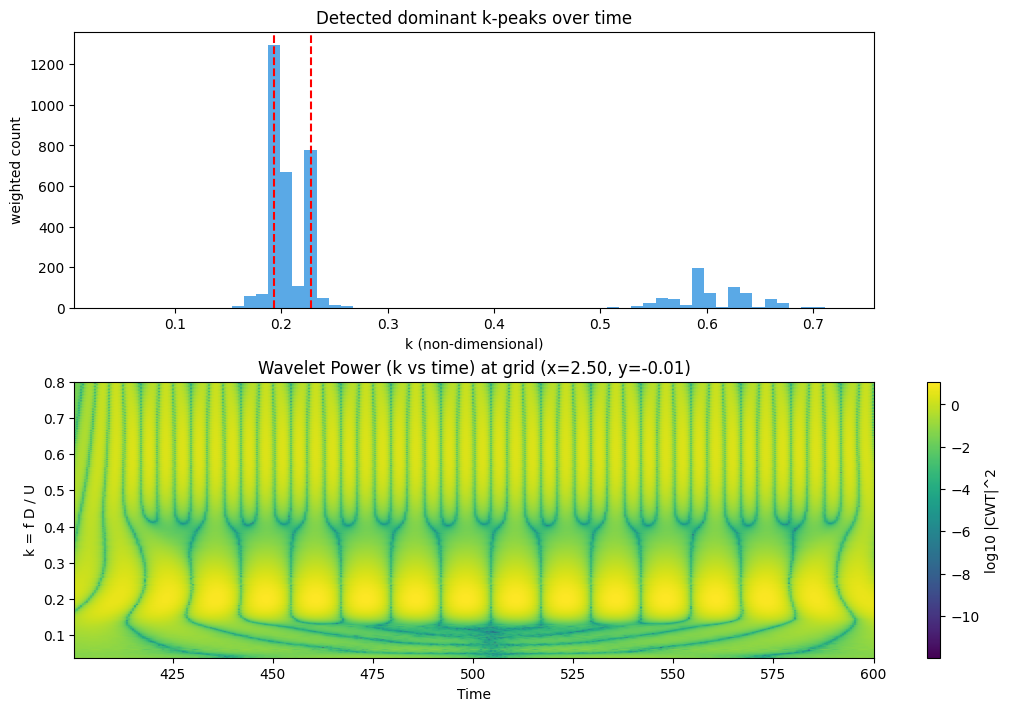

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks
from scipy.io import loadmat

# ====================== USER SETTINGS ======================
MAT_PATH = '/content/drive/MyDrive/Re500_RV5_D0p25/VortZ_interp.mat'  # <-- change if needed
x_target, y_target = 2.5, 0.0         # point to analyze (will snap to nearest grid point)
U, D = 0.2, 1.0                       # for k = f D / U

K_MIN, K_MAX = 0.0, 0.8               # k-range to analyze
NFREQ = 800                           # k-resolution for CWT (increase if you want finer)
PEAK_KEEP_PERCENT = 90                # keep peaks above this percentile of power (per time slice)
PEAK_MIN_SEP_K = 0.03                 # min separation between peaks in k (to avoid duplicates)
MODE_MIN_HEIGHT_FRAC = 0.2            # histogram peak must be >= this fraction of max to count as mode
MODE_TOL_K = 0.02                     # ±k band used to gather active times for a mode
TRIM_COI = 0.05                       # trim this fraction off start & end in time (cone of influence)
# ===========================================================

# ---------------- Load data ----------------
data = loadmat(MAT_PATH)
Xnew  = np.asarray(data['Xnew'])      # (n_points, n_times)
pxnew = np.asarray(data['pxnew']).ravel()
pynew = np.asarray(data['pynew']).ravel()
Time  = np.asarray(data['Time']).ravel()

dt    = float(np.mean(np.diff(Time)))
Tspan = float(Time[-1] - Time[0])
f_nyq = 0.5 / dt

# pick nearest grid point
idx = int(np.argmin((pxnew - x_target)**2 + (pynew - y_target)**2))
signal = np.asarray(Xnew[idx, :], dtype=float)
xg, yg = float(pxnew[idx]), float(pynew[idx])
print(f"Using grid point nearest to (x={x_target:.3f}, y={y_target:.3f}) -> "
      f"(x={xg:.3f}, y={yg:.3f}); dt={dt:.6g}s, span={Tspan:.3f}s")

# ---------------- CWT over safe band ----------------
# Convert requested k-band to frequency band, clamp to resolvable [fmin_phys, 0.9*Nyquist]
fmin_req, fmax_req = K_MIN*U/D, K_MAX*U/D
fmin_phys = max(1.5/Tspan, 1.0/(len(signal)*dt))
fmax_phys = 0.9*f_nyq
fmin = max(fmin_req, fmin_phys)
fmax = min(fmax_req if K_MAX > 0 else fmax_phys, fmax_phys)
if fmax <= fmin:
    raise ValueError("Invalid frequency band—check K_MIN/K_MAX or your sampling.")

fgrid  = np.linspace(fmin, fmax, NFREQ)
scales = pywt.scale2frequency('morl', 1.0) / (fgrid * dt)
W, freqs = pywt.cwt(signal, scales, 'morl', sampling_period=dt)
power = np.abs(W)**2
kgrid = freqs * D / U

print(f"Effective band: f ∈ [{fmin:.4f},{fmax:.4f}] Hz  →  k ∈ [{kgrid.min():.3f},{kgrid.max():.3f}]")

# ---------------- detect peaks (per time) ----------------
T = power.shape[1]
i0, i1 = int(TRIM_COI*T), int((1-TRIM_COI)*T)  # trim COI edges
dk = float(np.median(np.diff(kgrid)))
min_dist_pts = max(1, int(PEAK_MIN_SEP_K / dk))

peak_times = []
peak_ks    = []
peak_vals  = []

for it in range(i0, i1):
    col = power[:, it]
    thr = np.percentile(col, PEAK_KEEP_PERCENT)  # per-time threshold
    peaks, _ = find_peaks(col, height=thr, distance=min_dist_pts)
    if peaks.size:
        peak_times.extend([Time[it]]*len(peaks))
        peak_ks.extend(kgrid[peaks])
        peak_vals.extend(col[peaks])

peak_times = np.array(peak_times)
peak_ks    = np.array(peak_ks)
peak_vals  = np.array(peak_vals)

if peak_ks.size == 0:
    raise RuntimeError("No peaks detected—lower PEAK_KEEP_PERCENT or PEAK_MIN_SEP_K.")

# ---------------- group into modes via histogram ----------------
nbins = 60
hist, edges = np.histogram(peak_ks, bins=nbins, weights=peak_vals)
centers = 0.5*(edges[:-1] + edges[1:])
mode_peaks, props = find_peaks(hist, height=np.max(hist)*MODE_MIN_HEIGHT_FRAC)
dominant_k = centers[mode_peaks]

print("\nDetected dominant modes (k):", ", ".join(f"{k0:.3f}" for k0 in dominant_k) if dominant_k.size else "none")

# ---------------- active windows per mode ----------------
def contiguous_windows(tarr, gap_tol=2*dt):
    """Given sorted times, merge into contiguous windows with max gap gap_tol."""
    if tarr.size == 0:
        return []
    tarr = np.sort(tarr)
    starts = [tarr[0]]
    ends   = []
    for i in range(1, tarr.size):
        if tarr[i] - tarr[i-1] > gap_tol:
            ends.append(tarr[i-1])
            starts.append(tarr[i])
    ends.append(tarr[-1])
    return list(zip(starts, ends))

print("\nActive time windows:")
for k0 in dominant_k:
    mask = np.abs(peak_ks - k0) <= MODE_TOL_K
    t_active = peak_times[mask]
    wins = contiguous_windows(t_active)
    if not wins:
        print(f"  k≈{k0:.3f}: (no contiguous activity found)")
        continue
    total = sum(te-ts for ts, te in wins)
    print(f"  k≈{k0:.3f}: {len(wins)} window(s), total {total:.2f}s")
    for (ts, te) in wins:
        print(f"     [{ts:.2f}, {te:.2f}]  (Δt={te-ts:.2f}s)")

# ---------------- plots ----------------
fig, ax = plt.subplots(2, 1, figsize=(10,7), constrained_layout=True)

# (1) histogram of k-peaks with detected modes
ax[0].bar(centers, hist, width=np.diff(edges), align='center', color='#5aa9e6')
for k0 in dominant_k:
    ax[0].axvline(k0, color='r', ls='--', lw=1.5)
ax[0].set_xlabel('k (non-dimensional)')
ax[0].set_ylabel('weighted count')
ax[0].set_title('Detected dominant k-peaks over time')

# (2) scalogram
extent = [Time[0], Time[-1], kgrid[0], kgrid[-1]]
pcm = ax[1].imshow(np.log10(power + 1e-12), aspect='auto', origin='lower',
                   extent=extent, cmap='viridis')
fig.colorbar(pcm, ax=ax[1], label='log10 |CWT|^2')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('k = f D / U')
ax[1].set_title(f'Wavelet Power (k vs time) at grid (x={xg:.2f}, y={yg:.2f})')

plt.show()



Mode centers: k1=0.193, k2=0.227  (band ±0.02)
Estimated switching period from ACF: ~13.00 s
Median interval between switches: 6.25 s  (mean 24.12 s, N=8)


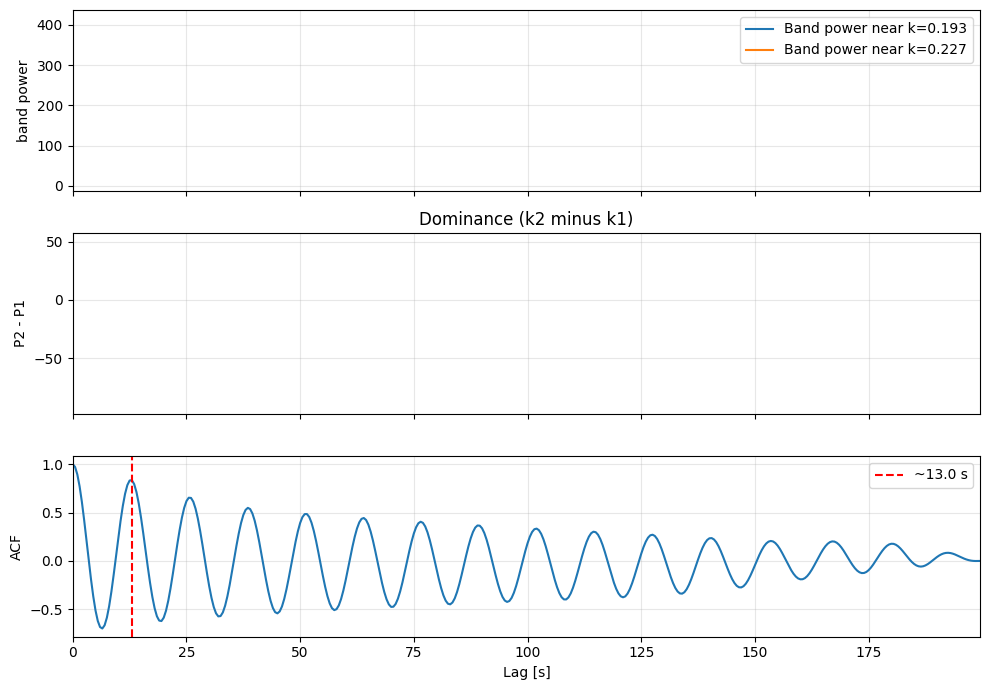

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# --- choose the two mode centers ---
# If you already have 'dominant_k' from the script, pick the closest two:
try:
    ks = np.sort(dominant_k)
    k1, k2 = float(ks[0]), float(ks[1])
except Exception:
    k1, k2 = 0.193, 0.227  # fallback

dk_band = 0.02         # integrate ±dk around each center
smooth_sec = 3.0       # moving-average smoothing in seconds
dt = float(np.mean(np.diff(Time)))
win = max(1, int(round(smooth_sec/dt)))

def band_power_series(k0):
    mask = (kgrid >= k0 - dk_band) & (kgrid <= k0 + dk_band)
    s = power[mask, :].sum(axis=0)
    if win > 1:
        s = np.convolve(s, np.ones(win)/win, mode='same')
    return s

P1 = band_power_series(k1)
P2 = band_power_series(k2)

# dominance signal: >0 means k2 dominates, <0 means k1 dominates
s = P2 - P1

# find crossing times (switches)
signs = np.sign(s)
edges = np.where(np.diff(signs) != 0)[0]
switch_times = 0.5*(Time[edges] + Time[edges+1])  # mid between samples

# estimate period from autocorrelation of s(t)
s0 = s - s.mean()
acf = correlate(s0, s0, mode='full')
lags = np.arange(-len(s0)+1, len(s0))
mid = len(s0)-1
acf = acf[mid:] / acf[mid]     # normalize, keep non-negative lags
lags_t = lags[mid:] * dt

# first non-zero-lag peak as period estimate
# skip the first few seconds to avoid picking the width of the central lobe
skip = int(round(5.0/dt))
peak_idx = skip + np.argmax(acf[skip:])
T_est = lags_t[peak_idx]

print(f"\nMode centers: k1={k1:.3f}, k2={k2:.3f}  (band ±{dk_band})")
print(f"Estimated switching period from ACF: ~{T_est:.2f} s")
if switch_times.size >= 2:
    diffs = np.diff(switch_times)
    print(f"Median interval between switches: {np.median(diffs):.2f} s  "
          f"(mean {np.mean(diffs):.2f} s, N={len(diffs)})")
else:
    print("Not enough switches detected to compute intervals.")

# --- plots ---
fig, ax = plt.subplots(3, 1, figsize=(10,7), sharex=True)
ax[0].plot(Time, P1, label=f'Band power near k={k1:.3f}')
ax[0].plot(Time, P2, label=f'Band power near k={k2:.3f}')
ax[0].set_ylabel('band power'); ax[0].legend(); ax[0].grid(alpha=0.3)

ax[1].plot(Time, s, color='k', lw=1.0)
for ts in switch_times:
    ax[1].axvline(ts, color='orange', alpha=0.25)
ax[1].set_ylabel('P2 - P1'); ax[1].set_title('Dominance (k2 minus k1)')
ax[1].grid(alpha=0.3)

ax[2].plot(lags_t, acf)
ax[2].axvline(T_est, color='r', ls='--', label=f'~{T_est:.1f} s')
ax[2].set_xlim(0, lags_t[-1])
ax[2].set_xlabel('Lag [s]'); ax[2].set_ylabel('ACF'); ax[2].legend()
ax[2].grid(alpha=0.3)
plt.tight_layout(); plt.show()
